In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## Exercise 2.1

In [2]:
# Arms rewards
INTERVALS = [(-4,3),(1,5),(2,3),(-2,5),(0,4),(1,4),(3,7)]

# Expected value of every arm
arms_expected = np.zeros(7)
for x, interval in enumerate(INTERVALS):
    arms_expected[x] = (interval[-1] + interval[0])/2

Expected reward for each arm

In [3]:
arms_expected

array([-0.5,  3. ,  2.5,  1.5,  2. ,  2.5,  5. ])

Expected reward random action

In [4]:
arms_expected.mean()

2.2857142857142856

## Exercise 2.2

In [8]:
# Draw sample from reward interval
def get_reward(action):
    interval = INTERVALS[action]
    return np.random.randint(interval[0], interval[1])

# Get the greedy action
def get_greedy_action(Q):
    avg_rews = [sum(arm_rews) / len(arm_rews) if len(arm_rews) > 0 else -np.inf for arm_rews in Q]
    action = avg_rews.index(max(avg_rews))
    return action

def compute_action(Q, greedy=True):
    if greedy:
        action = get_greedy_action(Q)
    else:
        action = np.random.randint(0,7)
    
    # Sample new reward for
    # the given action
    reward = get_reward(action)

    # Update Q table
    Q[action].append(reward)

XYs = [[[], []] for x in range(8)]

def save_usage(Q, count):

    percentages = [0 for x in range(7)]
    
    for idx in range(len(Q)):
        if len(Q[idx]) != 0:
            percentages[idx] = len(Q[idx]) / len(np.concatenate(Q).ravel())

    for idx in range(len(Q)):
        XYs[idx][0].append(count)
        XYs[idx][1].append(percentages[idx])
    
    XYs[7][0].append(count)
    XYs[7][1].append(np.concatenate(Q).ravel().mean())    

def show_usage():
    for idx, color in enumerate(colors):
        # Plot avarage result
        plt.plot(XYs[idx][0], XYs[idx][1], color)
        plt.show()
    

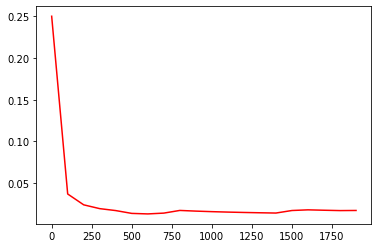

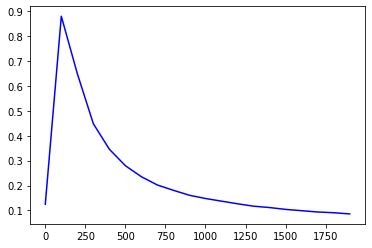

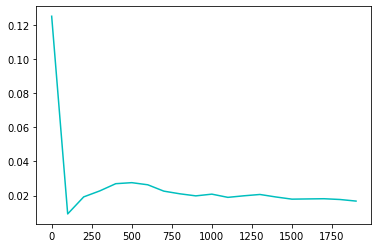

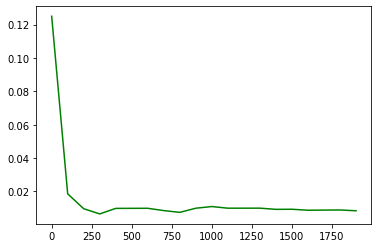

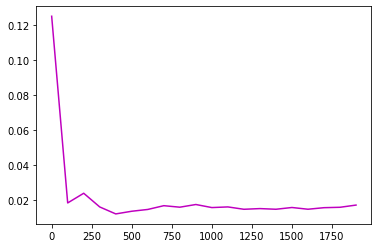

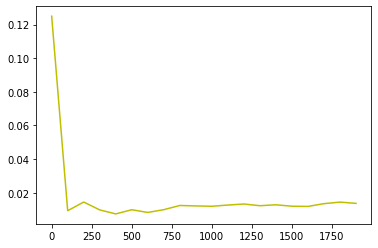

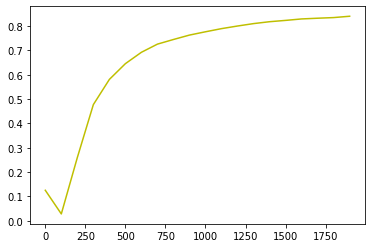

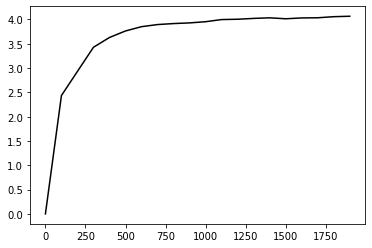

In [9]:
# Action/Reward table
Q = [[0] for x in range(7)]

# Epsilon
e = 0.1

# Colors
colors = ["-r", "-b", "-c", "-g","-m", "-y", "-y", "-k"]

for x in range(2000):
    # Exploit or Explore
    if np.random.uniform(0,1) > 0.1:
        compute_action(Q, True)
    else: 
        # Choose random action (i.e. arm)
        compute_action(Q, False)
    
    if x % 100 == 0:
        save_usage(Q, x)

show_usage()

## Exercise 2.3

In order to formulate the example as a **MDP** the **Markov property** has to hold (i.e. we have conditional indepence on the previous information, given the current state and action). We thereby identifiy the features of the **state**, the possible **actions** and some examples of the **transitional probabilities** and **reward expectations**.

#### State

The state needs to have the following features to it:

- Current task
- Whether a task was reattempted before

#### Actions

The possible actions at a current state are:

- Take an exam
- Retake an exam
- Skip an exam

#### Transitional Probabilities

We give below the example for state 1 (where 1 denotes the first exam). In particular we show what are the possible transitions we can have, given the actions identified above, and the state features defined.

- **P11 = Pr{s'=1 | s=1, a="take"} = 0.85**
- **P12 = Pr{s'=2 | s=1, a="retake"} = 0.85**
- **P12 = Pr{s'=2 | s=1, a="take"} = 0.15**
- **P12 = Pr{s'=2 | s=1, a="skip"} = 1**

and the same holds for the remaining states and transitions.

#### Rewards Expectations

Similarly to the above, we show the identified rewards expectations for state 1 (where 1 is the first exam).

- **R11 = E{s'=1 | s=1, a="take"} = 0**
- **R12 = E{s'=2 | s=1, a="take"} = 8**
- **R12 = E{s'=2 | s=1, a="skip"} = 0**
- **R12 = E{s'=2 | s=1, a="retake"} = 0**
- **R12 = E{s'=2 | s=1, a="retake"} = 8**

# Exercise 2.4

In [7]:
# Environment Data
data = [(8, 0.15),(6, 0.4),(10, 0.25),(2, 0.6),(7, 0.35),(3, 0.5),(20, 0.2)]

def policy(env):
    # Define state
    state = {"current": 0,
             "reattempted": False}
    
    # Policy reward
    reward = 0
    
    # Go through the exams
    while state["current"] < 7:
        # Current exam
        current = state["current"]

        # Action decision
        if np.random.uniform(0,1) <= env[current][1]:
            # Action: Take
            reward += env[current][0]
        elif not state["reattempted"] and np.random.uniform(0,1) <= env[current][1]:
            # Action: Retake
            reward += env[current][0]
        else:
            # Action: Skip
            state["reattempted"] = True

        # Update state
        state["current"] += 1
    
    return reward

print("Policy A: ", policy(data))
print("Policy B: ", policy(sorted(data, key=lambda x: x[1], reverse=True)))

Policy A:  10
Policy B:  13


## Exercise 2.5
A Markov assumption is not justified when it is required to keep track of a specific information regarding all the previous states. For example, if we consider an automated (robot) delivery truck that needs to ship to every costumer a specific parcel and report at the end whether each parcel was delivered or not. In this case, it is fundamental to keep track if every costumer received its parcel or not and hence to include at every state the delivery status of every costumer.